<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%978_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

–ó–∞–≤–¥–∞–Ω–Ω—è 1

–í—ñ–∑—å–º–∏ –∫–æ–¥ —Å–∏–º—É–ª—è—Ü—ñ—ó —ñ–∑ –∑–∞–≤–¥–∞–Ω–Ω—è 7 –¥–æ–º–∞—à–Ω—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è –¥–æ —Ç–µ–º–∏ 7 ‚Äú–¢–µ–æ—Ä—ñ—è –π–º–æ–≤—ñ—Ä–Ω–æ—Å—Ç–µ–π. –ö–æ–º–±—ñ–Ω–∞—Ç–æ—Ä–∏–∫–∞‚Äù. –ë—É–¥–µ–º–æ –≤–≤–∞–∂–∞—Ç–∏, —â–æ –∑–º—ñ–Ω–∞ —Ü—ñ–Ω–∏ –∞–∫—Ü—ñ–π —É –∫–æ–∂–Ω–∏–π –º–æ–º–µ–Ω—Ç —á–∞—Å—É –¥–æ—Ä—ñ–≤–Ω—é—î
x
‚àº
Œì
(
0.3
,
1.1
)
x‚àºŒì(0.3,1.1), –¥–µ
–ì
–ì ‚Äî –ø–æ–∑–Ω–∞—á–µ–Ω–Ω—è –≥–∞–º–º–∞-—Ä–æ–∑–ø–æ–¥—ñ–ª—É.



–ù–µ–æ–±—Ö—ñ–¥–Ω–æ –∑–∞–ø—É—Å—Ç–∏—Ç–∏ —Å–∏–º—É–ª—è—Ü—ñ—é
n
=
100
n=100 —Ä–∞–∑—ñ–≤ –¥–ª—è —Ä—ñ–∑–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å —á–∞—Å—É
t
t.

–∞) –ü–æ–±—É–¥—É–π –≥—ñ—Å—Ç–æ–≥—Ä–∞–º—É —Ä–æ–∑–ø–æ–¥—ñ–ª—É
x
x.

–±) –ó–∞–ø—É—Å—Ç–∏ —Å–∏–º—É–ª—è—Ü—ñ—é –∑
t
t –≤—ñ–¥ 1 –¥–æ, –Ω–∞–ø—Ä–∏–∫–ª–∞–¥, ~60 –∑ –∫—Ä–æ–∫–æ–º, –Ω–∞–ø—Ä–∏–∫–ª–∞–¥, 1 –∞–±–æ 2.

t=1: mean=0.279, std=0.527, p=0.000


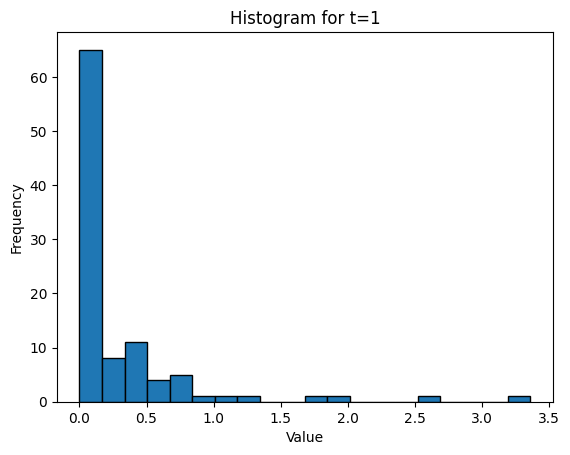

t=10: mean=3.320, std=1.767, p=0.000


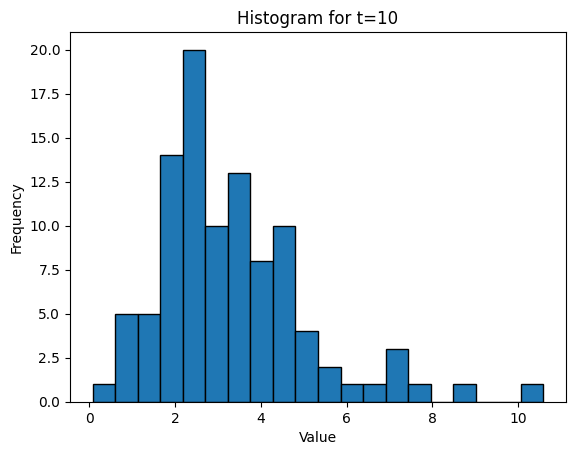

t=30: mean=10.508, std=3.915, p=0.000


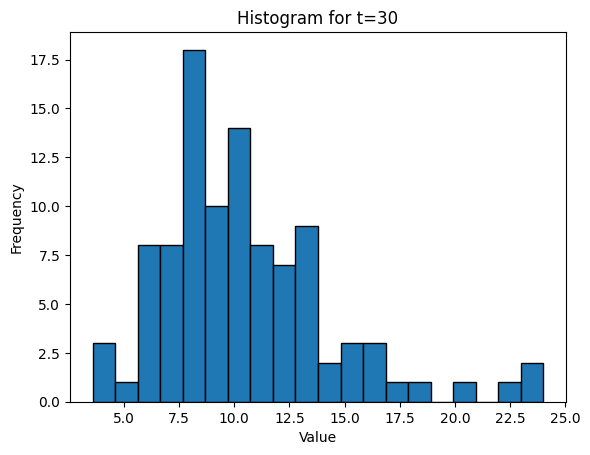

t=60: mean=19.781, std=4.346, p=0.284


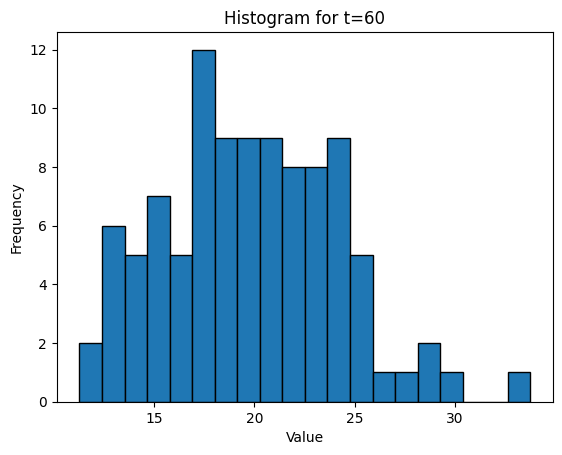

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# –ü–∞—Ä–∞–º–µ—Ç—Ä–∏
k_shape = 0.3
theta_scale = 1.1
n = 100
t_max = 60
rng = np.random.default_rng(42)

def simulate_sum_gamma_t(t, n):
    increments = rng.gamma(shape=k_shape, scale=theta_scale, size=(n, t))
    return increments.sum(axis=1)

# –°–∏–º—É–ª—è—Ü—ñ—ó –¥–ª—è t = 1..60
ts = range(1, t_max + 1)
samples_by_t = {t: simulate_sum_gamma_t(t, n) for t in ts}

# –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—ñ —ñ –≤–∏–≤—ñ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
for t in [1, 10, 30, 60]:
    sample = samples_by_t[t]
    stat, pval = normaltest(sample)
    print(f"t={t}: mean={np.mean(sample):.3f}, std={np.std(sample, ddof=1):.3f}, p={pval:.3f}")

    plt.hist(sample, bins=20, edgecolor="black")
    plt.title(f"Histogram for t={t}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
import numpy as np
import pandas as pd



# —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –¥–ª—è –≤—Å—ñ—Ö t
rows = []
for t in range(1, t_max + 1):
    sample = simulate_sum_gamma_t(t, n)
    stat, pval = normaltest(sample)
    mean, std = np.mean(sample), np.std(sample, ddof=1)
    theo_mean = k_shape * t * theta_scale
    theo_std = np.sqrt(k_shape * t) * theta_scale
    rows.append({
        "t": t,
        "mean": round(mean, 3),
        "std": round(std, 3),
        "normaltest_p": round(pval, 3),
        "theoretical_mean": round(theo_mean, 3),
        "theoretical_std": round(theo_std, 3)
    })

df_results = pd.DataFrame(rows)
print(df_results.to_string(index=False))


 t   mean   std  normaltest_p  theoretical_mean  theoretical_std
 1  0.446 0.789         0.000              0.33            0.602
 2  0.731 0.874         0.000              0.66            0.852
 3  0.963 1.133         0.000              0.99            1.044
 4  1.650 1.496         0.000              1.32            1.205
 5  1.779 1.451         0.000              1.65            1.347
 6  1.917 1.139         0.006              1.98            1.476
 7  2.408 1.369         0.033              2.31            1.594
 8  2.514 1.674         0.000              2.64            1.704
 9  3.077 1.819         0.000              2.97            1.807
10  3.034 1.719         0.000              3.30            1.905
11  3.701 2.171         0.000              3.63            1.998
12  4.119 2.267         0.005              3.96            2.087
13  4.282 2.533         0.000              4.29            2.172
14  4.506 2.179         0.003              4.62            2.254
15  4.578 1.925         0

# –í–∏—Å–Ω–æ–≤–æ–∫


–ü—Ä–∏ –º–∞–ª–∏—Ö
t
t —Å—É–º–∞ –ø—Ä–∏—Ä–æ—Å—Ç—ñ–≤ –º–∞—î —Ä–æ–∑–ø–æ–¥—ñ–ª, –¥–∞–ª–µ–∫–∏–π –≤—ñ–¥ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (—á–µ—Ä–µ–∑ –∞—Å–∏–º–µ—Ç—Ä—ñ—é –≥–∞–º–º–∞-—Ä–æ–∑–ø–æ–¥—ñ–ª—É).

–Ü–∑ —Ä–æ—Å—Ç–æ–º
t
t, –∑–∞–≤–¥—è–∫–∏ –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ñ–π –ì—Ä–∞–Ω–∏—á–Ω—ñ–π –¢–µ–æ—Ä–µ–º—ñ, —Ä–æ–∑–ø–æ–¥—ñ–ª —Å—É–º–∏
S
t
S
t
‚Äã
  –Ω–∞–±–ª–∏–∂–∞—î—Ç—å—Å—è –¥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ.

–¢–µ–æ—Ä–µ—Ç–∏—á–Ω—ñ —Å–µ—Ä–µ–¥–Ω—ñ —Ç–∞ –¥–∏—Å–ø–µ—Ä—Å—ñ—ó –¥–æ–±—Ä–µ —É–∑–≥–æ–¥–∂—É—é—Ç—å—Å—è –∑ –µ–º–ø—ñ—Ä–∏—á–Ω–∏–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Å–∏–º—É–ª—è—Ü—ñ–π.



–ó–∞–≤–¥–∞–Ω–Ω—è 2

–ó–∞–≤–∞–Ω—Ç–∞–∂ –Ω–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö Product Advertising Data (–ø–æ—Å–∏–ª–∞–Ω–Ω—è –Ω–∞ –¥–∏—Å–∫). –ù–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö —Å–∫–ª–∞–¥–∞—î—Ç—å—Å—è —ñ–∑ —Å–µ–º–∏ —Å—Ç–æ–≤–ø—á–∏–∫—ñ–≤, —â–æ –≤—ñ–¥–æ–±—Ä–∞–∂–∞—é—Ç—å –≤–∏—Ç—Ä–∞—Ç–∏ –Ω–∞ —Ä–µ–∫–ª–∞–º—É –Ω–∞ —Ä—ñ–∑–Ω–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö ‚Äî —Ç–µ–ª–µ–±–∞—á–µ–Ω–Ω—è, –±—ñ–ª–±–æ—Ä–¥–∏, Google Ads, —Å–æ—Ü—ñ–∞–ª—å–Ω—ñ –º–µ–¥—ñ–∞, —ñ–Ω—Ñ–ª—é–µ–Ω—Å-–º–∞—Ä–∫–µ—Ç–∏–Ω–≥ —Ç–∞ –ø–∞—Ä—Ç–Ω–µ—Ä—Å—å–∫–∏–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥.



–û—Å—Ç–∞–Ω–Ω—ñ–π —Å—Ç–æ–≤–ø—á–∏–∫, "Product_Sold", –º—ñ—Å—Ç–∏—Ç—å –∫—ñ–ª—å–∫—ñ—Å–Ω—É –æ—Ü—ñ–Ω–∫—É –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ—ó –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø—Ä–æ–¥–∞–Ω–∏—Ö –æ–¥–∏–Ω–∏—Ü—å —Ç–æ–≤–∞—Ä—É. –î–ª—è –∫–æ–∂–Ω–æ—ó –∫–æ–ª–æ–Ω–∫–∏ –ø–æ—Ä–∞—Ö—É–π —Å–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è, –¥–∏—Å–ø–µ—Ä—Å—ñ—é, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è, –ø–æ–±—É–¥—É–π –≥—ñ—Å—Ç–æ–≥—Ä–∞–º—É —Ä–æ–∑–ø–æ–¥—ñ–ª—É –ø–æ–∫–∞–∑–Ω–∏–∫–∞, –ø–µ—Ä–µ–≤—ñ—Ä –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å —Ä–æ–∑–ø–æ–¥—ñ–ª—É —Ç–∞ –ø–æ—Ä–∞—Ö—É–π –∫–æ—Ä–µ–ª—è—Ü—ñ—é –∑ Product_Sold.

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# –®–ª—è—Ö –¥–æ —Ñ–∞–π–ª—É (–∑–∞–ª–µ–∂–∏—Ç—å –∫—É–¥–∏ —Ç–∏ –π–æ–≥–æ –ø–æ–∫–ª–∞–≤)
python_material_folder_name = "neo_data/Advertising_Data.csv" #"Advertising Data.csv"




# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

Mounted at /content/drive
drive/MyDrive/neo_data/Advertising_Data.csv/notebooks


In [ ]:
# –®–ª—è—Ö –¥–æ —Ñ–∞–π–ª—É (–∑–∞–ª–µ–∂–∏—Ç—å –∫—É–¥–∏ —Ç–∏ –π–æ–≥–æ –ø–æ–∫–ª–∞–≤)
file_path = "/content/drive/MyDrive/neo_data/Advertising_Data.csv"

# –ß–∏—Ç–∞—î–º–æ CSV
df = pd.read_csv(file_path)

print(df.head())

       TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0  281.42      538.80      123.94        349.30                242.77   
1  702.97      296.53      558.13        180.55                781.06   
2  313.14      295.94      642.96        505.71                438.91   
3  898.52       61.27      548.73        240.93                278.96   
4  766.52      550.72      651.91        666.33                396.33   

   Affiliate_Marketing  Product_Sold  
0               910.10        7164.0  
1               132.43        5055.0  
2               464.23        6154.0  
3               432.27        5480.0  
4               841.93        9669.0  


–ê–ù–ê–õ–Ü–ó –î–ê–ù–ò–• PRODUCT ADVERTISING

üìä –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ –¥–∞—Ç–∞—Å–µ—Ç —Ä–æ–∑–º—ñ—Ä–æ–º: 300 —Ä—è–¥–∫—ñ–≤ √ó 7 —Å—Ç–æ–≤–ø—Ü—ñ–≤

üìã –°—Ç–æ–≤–ø—Ü—ñ –≤ –¥–∞—Ç–∞—Å–µ—Ç—ñ:
   1. TV
   2. Billboards
   3. Google_Ads
   4. Social_Media
   5. Influencer_Marketing
   6. Affiliate_Marketing
   7. Product_Sold

üîç –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è:
   –ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –Ω–µ–º–∞—î ‚úì

–°–¢–ê–¢–ò–°–¢–ò–ß–ù–ò–ô –ê–ù–ê–õ–Ü–ó –ü–û–ö–ê–ó–ù–ò–ö–Ü–í

üìà –ê–Ω–∞–ª—ñ–∑ –ø–æ–∫–∞–∑–Ω–∏–∫–∞: TV
----------------------------------------
  ‚Ä¢ –°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è: 517.4310
  ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å—ñ—è: 83010.1336
  ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: 288.1148
  ‚Ä¢ –ú–µ–¥—ñ–∞–Ω–∞: 513.9700
  ‚Ä¢ –ú—ñ–Ω—ñ–º—É–º: 1.0400
  ‚Ä¢ –ú–∞–∫—Å–∏–º—É–º: 998.1000
  ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ Product_Sold: 0.3742
  ‚Ä¢ –¢–µ—Å—Ç Shapiro-Wilk: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞=0.9549, p-value=0.0000 ‚Üí ‚úó –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π

üìà –ê–Ω–∞–ª—ñ–∑ –ø–æ

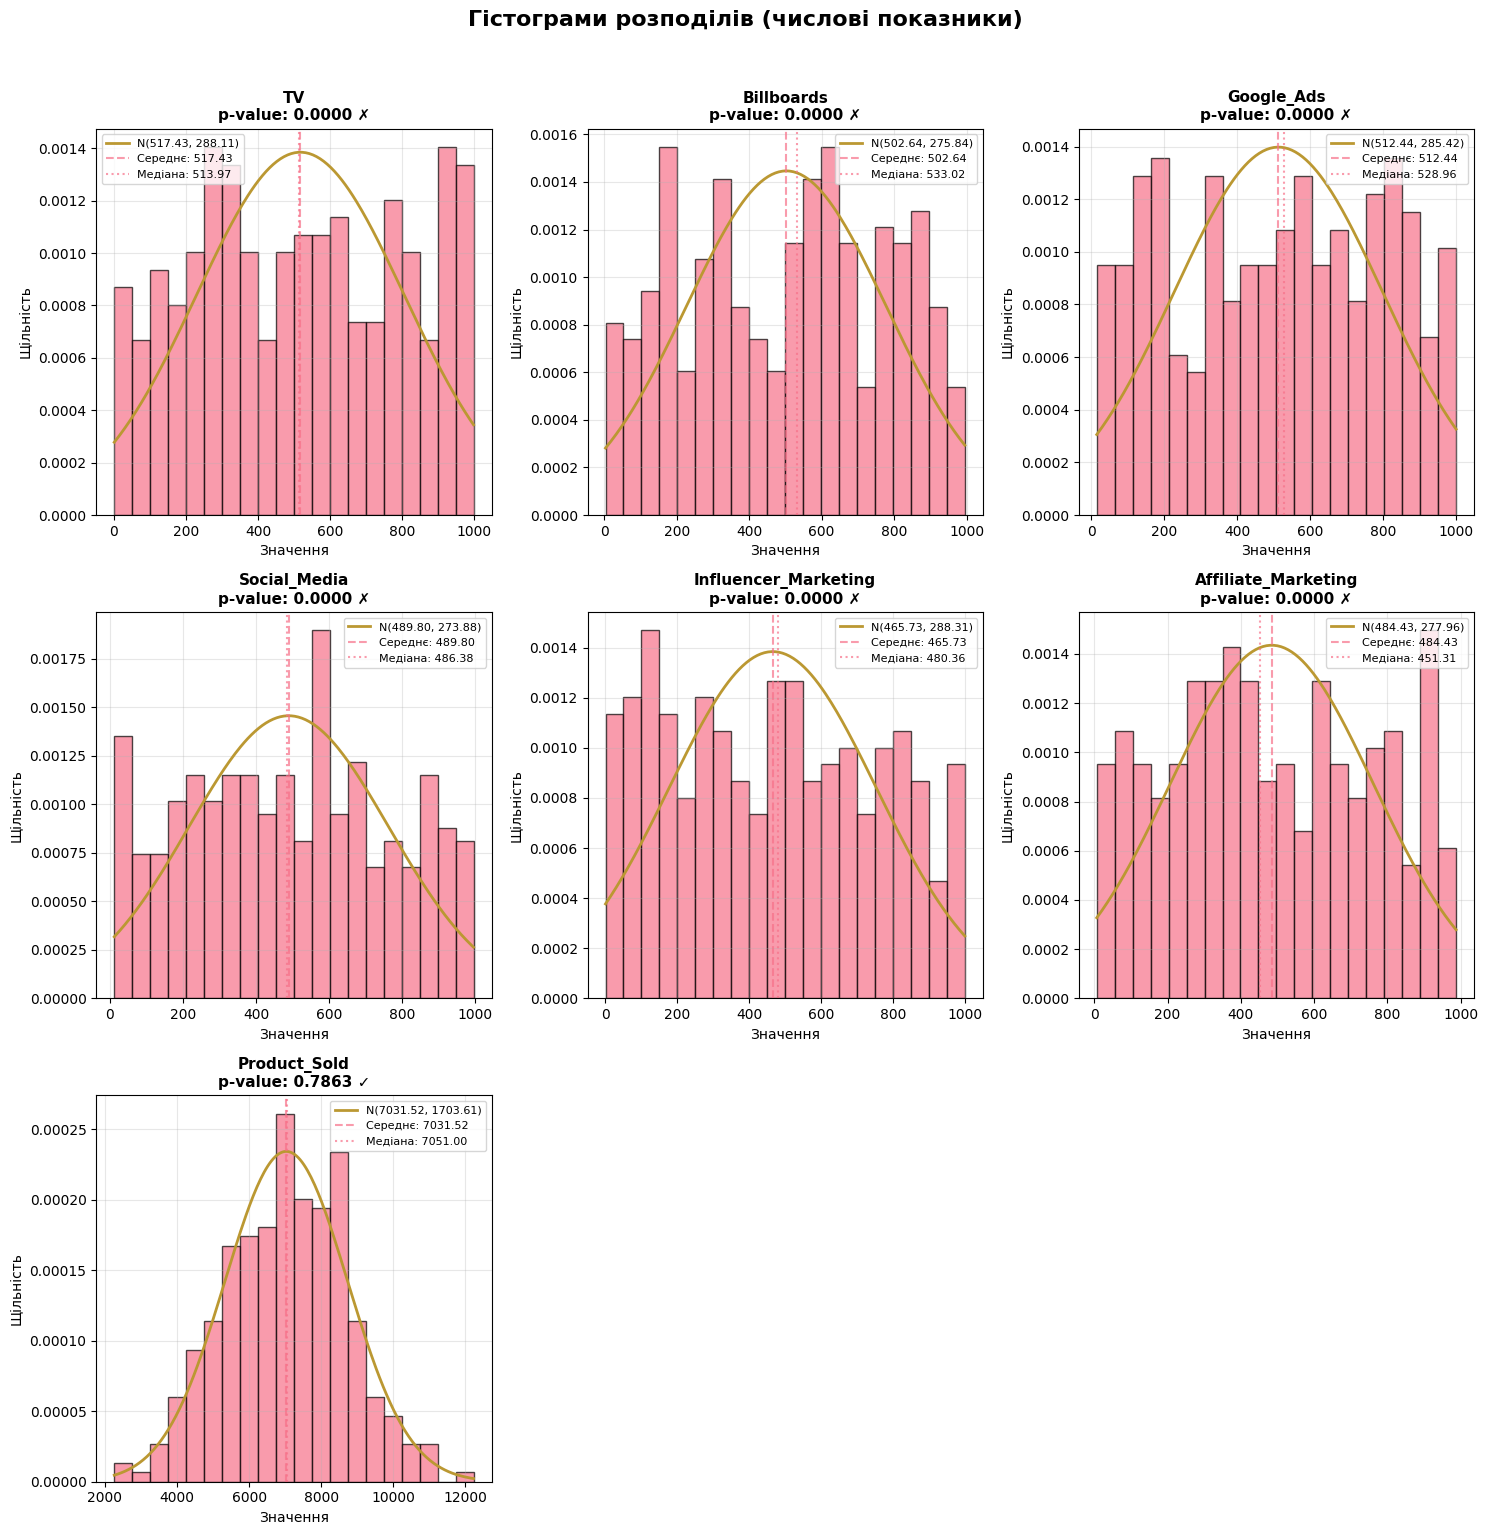


–ö–û–†–ï–õ–Ø–¶–Ü–ô–ù–ò–ô –ê–ù–ê–õ–Ü–ó

üìä –ö–æ—Ä–µ–ª—è—Ü—ñ—è —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–Ω–∞–ª—ñ–≤ –∑ Product_Sold (—Ç—ñ–ª—å–∫–∏ —á–∏—Å–ª–æ–≤—ñ):
   (–≤—ñ–¥—Å–æ—Ä—Ç–æ–≤–∞–Ω–æ –∑–∞ —Å–∏–ª–æ—é –∑–≤'—è–∑–∫—É)

      –†–µ–∫–ª–∞–º–Ω–∏–π –∫–∞–Ω–∞–ª  –ö–æ—Ä–µ–ª—è—Ü—ñ—è  –ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è –°–∏–ª–∞ –∑–≤'—è–∑–∫—É
 Affiliate_Marketing     0.6116          0.6116     –ü–æ–º—ñ—Ä–Ω–∏–π
          Billboards     0.4806          0.4806     –ü–æ–º—ñ—Ä–Ω–∏–π
        Social_Media     0.4011          0.4011     –ü–æ–º—ñ—Ä–Ω–∏–π
                  TV     0.3742          0.3742     –ü–æ–º—ñ—Ä–Ω–∏–π
          Google_Ads     0.2037          0.2037      –°–ª–∞–±–∫–∏–π
Influencer_Marketing     0.1408          0.1408      –°–ª–∞–±–∫–∏–π


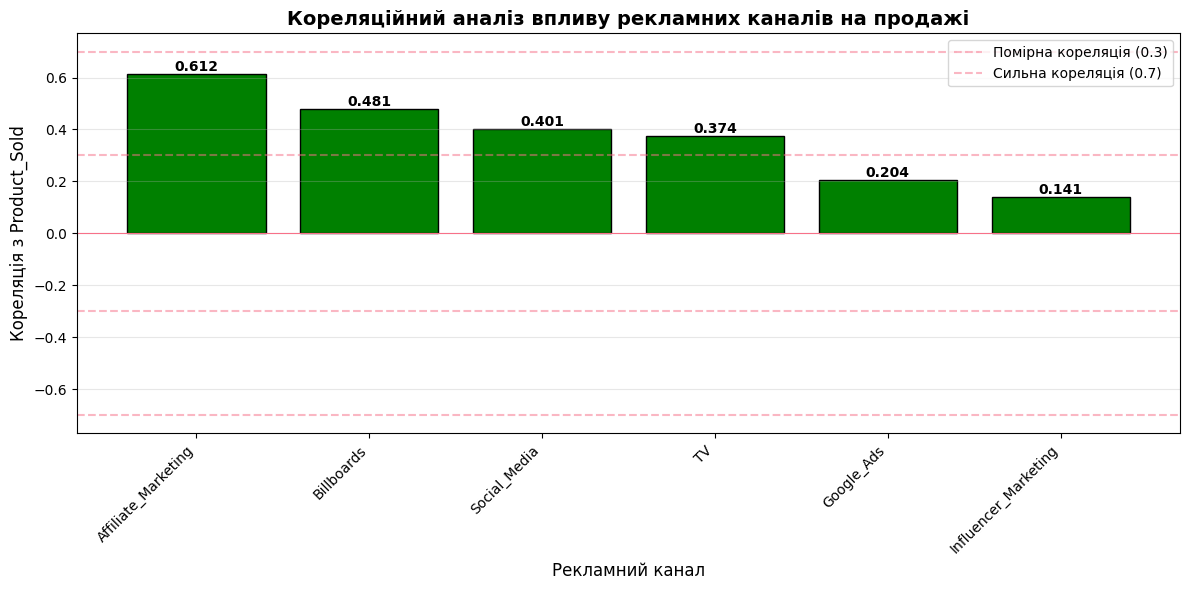


üìä –ü–æ–±—É–¥–æ–≤–∞ –º–∞—Ç—Ä–∏—Ü—ñ –∫–æ—Ä–µ–ª—è—Ü—ñ–π (—á–∏—Å–ª–æ–≤—ñ –∫–æ–ª–æ–Ω–∫–∏)...


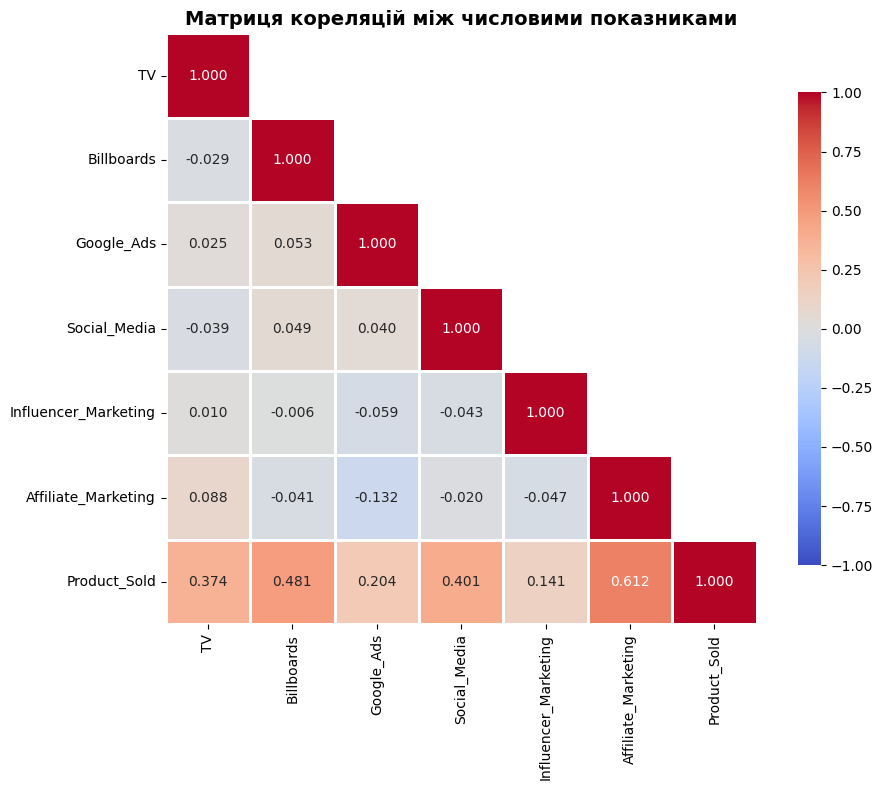


üìä –ü–æ–±—É–¥–æ–≤–∞ Q-Q –≥—Ä–∞—Ñ—ñ–∫—ñ–≤ –¥–ª—è –ø–µ—Ä–µ–≤—ñ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—ñ (—á–∏—Å–ª–æ–≤—ñ)...


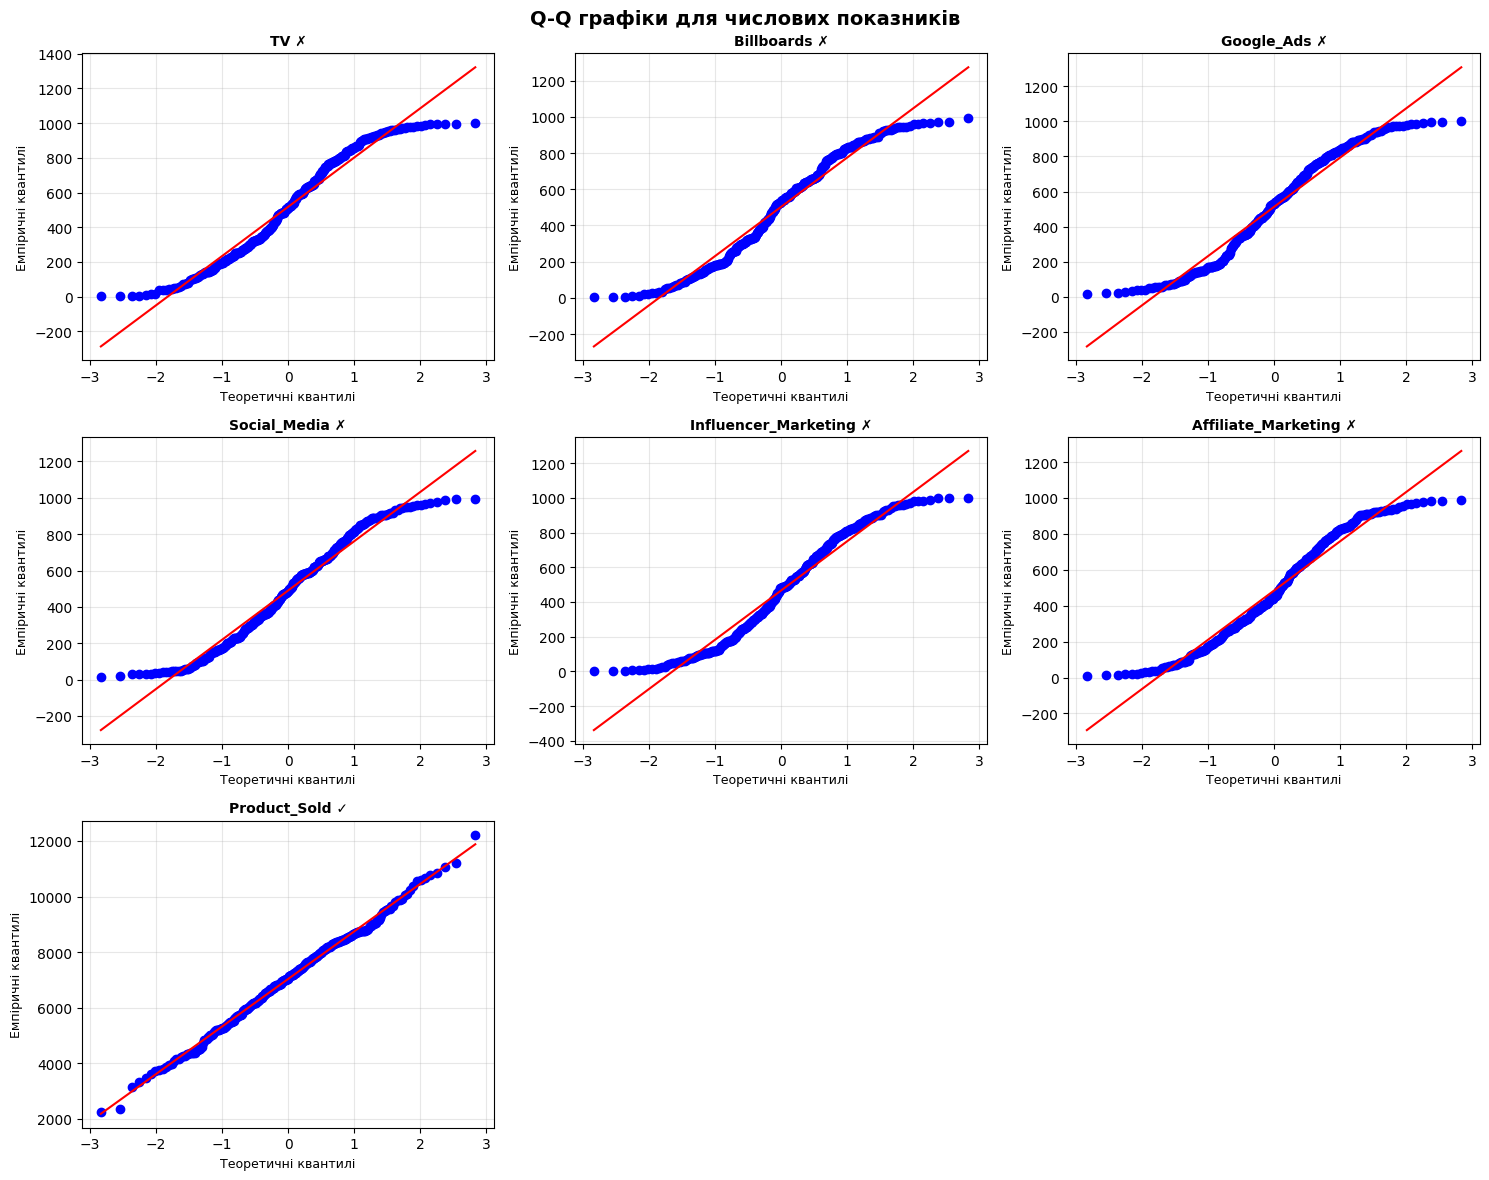


–ê–ù–ê–õ–Ü–ó –ù–ê–ô–í–ü–õ–ò–í–û–í–Ü–®–ò–• –†–ï–ö–õ–ê–ú–ù–ò–• –ö–ê–ù–ê–õ–Ü–í

üèÜ –¢–û–ü-3 –Ω–∞–π–≤–ø–ª–∏–≤–æ–≤—ñ—à—ñ —Ä–µ–∫–ª–∞–º–Ω—ñ –∫–∞–Ω–∞–ª–∏:
   1. Affiliate_Marketing: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = 0.6116 (–ü–æ–º—ñ—Ä–Ω–∏–π)
   2. Billboards: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = 0.4806 (–ü–æ–º—ñ—Ä–Ω–∏–π)
   3. Social_Media: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = 0.4011 (–ü–æ–º—ñ—Ä–Ω–∏–π)

üìâ –ù–∞–π–º–µ–Ω—à –≤–ø–ª–∏–≤–æ–≤—ñ —Ä–µ–∫–ª–∞–º–Ω—ñ –∫–∞–Ω–∞–ª–∏:
   1. Google_Ads: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = 0.2037 (–°–ª–∞–±–∫–∏–π)
   2. Influencer_Marketing: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = 0.1408 (–°–ª–∞–±–∫–∏–π)

–§–Ü–ù–ê–õ–¨–ù–Ü –í–ò–°–ù–û–í–ö–ò

üìä –ü—ñ–¥—Å—É–º–∫–∏ –∞–Ω–∞–ª—ñ–∑—É –¥–∞–Ω–∏—Ö Product Advertising:

1. –°–¢–ê–¢–ò–°–¢–ò–ß–ù–ò–ô –ê–ù–ê–õ–Ü–ó:
   ‚úì –†–æ–∑—Ä–∞—Ö–æ–≤–∞–Ω–æ –±–∞–∑–æ–≤—ñ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –ø–æ–∫–∞–∑–Ω–∏–∫–∞
   ‚úì –û–±—Ä–æ–±–ª–µ–Ω–æ –Ω–µ—á–∏—Å–ª–æ–≤—ñ/–∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏ –±–µ–∑ –∑–±–æ—ó–≤

2. –ü–ï–†–ï–í–Ü–†–ö–ê –ù–ê –ù–û–†–ú–ê–õ–¨–ù–Ü–°–¢–¨:
   ‚Ä¢ –î–ª—è n ‚â§ 5000 –≤–∏–∫–æ

In [9]:
import sys
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, normaltest
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ù–ê–õ–ê–®–¢–£–í–ê–ù–ù–Ø –°–¢–ò–õ–Æ (–∑–∞–ª–∏—à–µ–Ω–æ —è–∫ —É —Ç–µ–±–µ)
plt.style.use('default')
sns.set_palette("husl")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –£–¢–ò–õ–Ü–¢–ò

def safe_read_gsheet_csv(edit_url: str) -> pd.DataFrame:
    """–ó–∞–≤–∞–Ω—Ç–∞–∂—É—î CSV –∑ Google Sheets edit-URL; –∫–∏–¥–∞—î –∑—Ä–æ–∑—É–º—ñ–ª—É –ø–æ–º–∏–ª–∫—É."""
    if "/edit" in edit_url:
        csv_url = edit_url[:edit_url.find('/edit')] + '/export?format=csv'
    else:
        # —è–∫—â–æ –≤–∂–µ –¥–∞–¥—É—Ç—å /export?format=csv
        csv_url = edit_url
    try:
        df = pd.read_csv(csv_url)
    except Exception as e:
        print("‚ùå –ü–æ–º–∏–ª–∫–∞ –∑–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö —ñ–∑ Google Sheets:", file=sys.stderr)
        print(str(e), file=sys.stderr)
        raise
    return df

def numeric_columns(df: pd.DataFrame) -> list:
    """–ü–æ–≤–µ—Ä—Ç–∞—î –ª–∏—à–µ —á–∏—Å–ª–æ–≤—ñ –∫–æ–ª–æ–Ω–∫–∏ (float, int, bool‚Üíint)."""
    # bool –ø–µ—Ä–µ–≤–æ–¥–∏–º–æ –¥–æ int, —â–æ–± –Ω–µ –ª–∞–º–∞—Ç–∏ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó
    for c in df.columns:
        if df[c].dtype == bool:
            df[c] = df[c].astype(int)
    return list(df.select_dtypes(include=[np.number]).columns)

def shapiro_or_normaltest(x: pd.Series):
    """
    Shapiro-Wilk –∫–æ—Ä–µ–∫—Ç–Ω–∏–π –¥–ª—è n ‚àà [3, 5000].
    –î–ª—è –≤–µ–ª–∏–∫–∏—Ö –≤–∏–±—ñ—Ä–æ–∫ –∑–∞—Å—Ç–æ—Å–æ–≤—É—î–º–æ D‚ÄôAgostino-Pearson (normaltest).
    –ü–æ–≤–µ—Ä—Ç–∞—î (stat, pvalue, method).
    """
    x = x.dropna().astype(float)
    n = len(x)
    if n < 3:
        return (np.nan, np.nan, "insufficient_n")
    if n <= 5000:
        stat, p = shapiro(x)
        return (stat, p, "shapiro")
    else:
        stat, p = normaltest(x)
        return (stat, p, "normaltest")

def safe_corr(a: pd.Series, b: pd.Series) -> float:
    """–ö–æ—Ä–µ–ª—è—Ü—ñ—è –ü—ñ—Ä—Å–æ–Ω–∞ –∑ —ñ–≥–Ω–æ—Ä–æ–º NaN; —è–∫—â–æ –Ω–µ—á–∏—Å–ª–æ–≤–µ/–∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–µ ‚Äî np.nan."""
    try:
        a = pd.to_numeric(a, errors="coerce")
        b = pd.to_numeric(b, errors="coerce")
        if a.nunique(dropna=True) < 2 or b.nunique(dropna=True) < 2:
            return np.nan
        return a.corr(b)
    except Exception:
        return np.nan

def strength_label(r_abs: float) -> str:
    if pd.isna(r_abs):
        return "–ù/–î"
    if r_abs > 0.7:
        return "–°–∏–ª—å–Ω–∏–π"
    if r_abs > 0.3:
        return "–ü–æ–º—ñ—Ä–Ω–∏–π"
    return "–°–ª–∞–±–∫–∏–π"

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ó–ê–í–ê–ù–¢–ê–ñ–ï–ù–ù–Ø –î–ê–ù–ò–•
print("=" * 80)
print("–ê–ù–ê–õ–Ü–ó –î–ê–ù–ò–• PRODUCT ADVERTISING")
print("=" * 80)

url = 'https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094'
df = safe_read_gsheet_csv(url)

print(f"\nüìä –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ –¥–∞—Ç–∞—Å–µ—Ç —Ä–æ–∑–º—ñ—Ä–æ–º: {df.shape[0]} —Ä—è–¥–∫—ñ–≤ √ó {df.shape[1]} —Å—Ç–æ–≤–ø—Ü—ñ–≤")
print("\nüìã –°—Ç–æ–≤–ø—Ü—ñ –≤ –¥–∞—Ç–∞—Å–µ—Ç—ñ:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# –ü—Ä–æ–ø—É—Å–∫–∏
print(f"\nüîç –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è:")
missing = df.isnull().sum()
if (missing > 0).any():
    print(missing[missing > 0])
else:
    print("   –ü—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –Ω–µ–º–∞—î ‚úì")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –°–¢–ê–¢–ò–°–¢–ò–ß–ù–ò–ô –ê–ù–ê–õ–Ü–ó
print("\n" + "=" * 80)
print("–°–¢–ê–¢–ò–°–¢–ò–ß–ù–ò–ô –ê–ù–ê–õ–Ü–ó –ü–û–ö–ê–ó–ù–ò–ö–Ü–í")
print("=" * 80)

num_cols = numeric_columns(df)
if not num_cols:
    print("‚ùó –í –¥–∞—Ç–∞—Å–µ—Ç—ñ –Ω–µ–º–∞—î —á–∏—Å–ª–æ–≤–∏—Ö —Å—Ç–æ–≤–ø—Ü—ñ–≤ ‚Äî –∞–Ω–∞–ª—ñ–∑ –Ω–µ–º–æ–∂–ª–∏–≤–∏–π.")
    sys.exit(0)

if 'Product_Sold' not in df.columns:
    print("‚ö†Ô∏è –°—Ç–æ–≤–ø—Ü—è 'Product_Sold' –Ω–µ–º–∞—î. –ö–æ—Ä–µ–ª—è—Ü—ñ—ó –∑ –Ω–∏–º –æ–±—á–∏—Å–ª–∏—Ç–∏ –Ω–µ–º–æ–∂–ª–∏–≤–æ.")
    target = None
else:
    target = 'Product_Sold'
    if target not in num_cols:
        # –Ø–∫—â–æ Product_Sold –Ω–µ—á–∏—Å–ª–æ–≤–∏–π ‚Äî —Å–ø—Ä–æ–±—É—î–º–æ –ø—Ä–∏–≤–µ—Å—Ç–∏
        df[target] = pd.to_numeric(df[target], errors="coerce")
        if df[target].notna().sum() == 0:
            print("‚ö†Ô∏è 'Product_Sold' –Ω–µ –≤–¥–∞–ª–æ—Å—è –ø–µ—Ä–µ—Ç–≤–æ—Ä–∏—Ç–∏ –¥–æ —á–∏—Å–ª–æ–≤–æ–≥–æ —Ñ–æ—Ä–º–∞—Ç—É.")
            target = None
        else:
            if target not in num_cols:
                num_cols.append(target)

stats_results = []

for col in df.columns:
    print(f"\nüìà –ê–Ω–∞–ª—ñ–∑ –ø–æ–∫–∞–∑–Ω–∏–∫–∞: {col}")
    print("-" * 40)

    s = df[col]
    s_num = pd.to_numeric(s, errors="coerce")

    mean_val     = float(np.nanmean(s_num))
    variance_val = float(np.nanvar(s_num, ddof=1)) if s_num.notna().sum() > 1 else np.nan
    std_val      = float(np.nanstd(s_num, ddof=1)) if s_num.notna().sum() > 1 else np.nan
    median_val   = float(np.nanmedian(s_num))
    min_val      = float(np.nanmin(s_num)) if s_num.notna().any() else np.nan
    max_val      = float(np.nanmax(s_num)) if s_num.notna().any() else np.nan

    print(f"  ‚Ä¢ –°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è: {mean_val:.4f}")
    print(f"  ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å—ñ—è: {variance_val:.4f}" if not np.isnan(variance_val) else "  ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å—ñ—è: –ù/–î")
    print(f"  ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: {std_val:.4f}" if not np.isnan(std_val) else "  ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: –ù/–î")
    print(f"  ‚Ä¢ –ú–µ–¥—ñ–∞–Ω–∞: {median_val:.4f}")
    print(f"  ‚Ä¢ –ú—ñ–Ω—ñ–º—É–º: {min_val:.4f}" if not np.isnan(min_val) else "  ‚Ä¢ –ú—ñ–Ω—ñ–º—É–º: –ù/–î")
    print(f"  ‚Ä¢ –ú–∞–∫—Å–∏–º—É–º: {max_val:.4f}" if not np.isnan(max_val) else "  ‚Ä¢ –ú–∞–∫—Å–∏–º—É–º: –ù/–î")

    if target and col != target:
        correlation = safe_corr(s, df[target])
        print(f"  ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ {target}: {correlation:.4f}" if not pd.isna(correlation) else f"  ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ {target}: –ù/–î")
    else:
        correlation = 1.0 if target and col == target else np.nan
        if target and col == target:
            print(f"  ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ {target}: 1.0000 (—Å–∞–º –∑ —Å–æ–±–æ—é)")
        elif target is None:
            print("  ‚Ä¢ –ö–æ—Ä–µ–ª—è—Ü—ñ—è: –ù/–î (–Ω–µ–º–∞—î —Ü—ñ–ª—å–æ–≤–æ–≥–æ —Å—Ç–æ–≤–ø—Ü—è)")

    # –¢–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å ‚Äî —Ç—ñ–ª—å–∫–∏ –¥–ª—è —á–∏—Å–ª–æ–≤–∏—Ö —ñ –∫–æ–ª–∏ –Ω–µ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞
    if pd.api.types.is_numeric_dtype(s_num) and s_num.dropna().nunique() >= 3:
        stat_n, p_n, method = shapiro_or_normaltest(s_num)
        is_normal = (p_n > 0.05) if pd.notna(p_n) else False
        method_label = "Shapiro-Wilk" if method == "shapiro" else ("D‚ÄôAgostino-Pearson" if method == "normaltest" else "‚Äî")
        if pd.notna(p_n):
            print(f"  ‚Ä¢ –¢–µ—Å—Ç {method_label}: —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞={stat_n:.4f}, p-value={p_n:.4f} ‚Üí {'‚úì –ù–æ—Ä–º–∞–ª—å–Ω–∏–π' if is_normal else '‚úó –ù–ï –Ω–æ—Ä–º–∞–ª—å–Ω–∏–π'}")
        else:
            print(f"  ‚Ä¢ –¢–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å: –Ω–µ–º–æ–∂–ª–∏–≤–æ (–Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—å–æ –¥–∞–Ω–∏—Ö)")
    else:
        p_n = np.nan
        is_normal = False
        print("  ‚Ä¢ –¢–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å: –ø—Ä–æ–ø—É—â–µ–Ω–æ (–Ω–µ—á–∏—Å–ª–æ–≤–∏–π/–∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–∏–π/–∑–∞–º–∞–ª–æ —Ç–æ—á–æ–∫)")

    stats_results.append({
        '–ü–æ–∫–∞–∑–Ω–∏–∫': col,
        '–°–µ—Ä–µ–¥–Ω—î': mean_val,
        '–î–∏—Å–ø–µ—Ä—Å—ñ—è': variance_val,
        '–°—Ç. –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è': std_val,
        '–ú–µ–¥—ñ–∞–Ω–∞': median_val,
        '–ú—ñ–Ω—ñ–º—É–º': min_val,
        '–ú–∞–∫—Å–∏–º—É–º': max_val,
        f'–ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ {target}' if target else '–ö–æ—Ä–µ–ª—è—Ü—ñ—è (–ù/–î)': correlation if col != target else np.nan,
        'p-value (–Ω–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å)': p_n,
        '–ù–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å': '–¢–∞–∫' if (pd.notna(p_n) and p_n > 0.05) else '–ù—ñ'
    })

stats_df = pd.DataFrame(stats_results)

print("\n" + "=" * 80)
print("–ó–í–ï–î–ï–ù–ê –¢–ê–ë–õ–ò–¶–Ø –°–¢–ê–¢–ò–°–¢–ò–ö")
print("=" * 80)
with pd.option_context('display.float_format', '{:.4f}'.format):
    print("\n", stats_df.to_string(index=False))

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ì–Ü–°–¢–û–ì–†–ê–ú–ò –î–õ–Ø –ß–ò–°–õ–û–í–ò–• –ö–û–õ–û–ù–û–ö
print("\n" + "=" * 80)
print("–ü–û–ë–£–î–û–í–ê –ì–Ü–°–¢–û–ì–†–ê–ú –†–û–ó–ü–û–î–Ü–õ–Ü–í (—Ç—ñ–ª—å–∫–∏ —á–∏—Å–ª–æ–≤—ñ)")
print("=" * 80)

plot_cols = [c for c in num_cols]  # —Ç—ñ–ª—å–∫–∏ —á–∏—Å–ª–æ–≤—ñ
n_cols = len(plot_cols)
if n_cols > 0:
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = np.array(axes).reshape(1, -1)
    axes = axes.flatten()

    for idx, col in enumerate(plot_cols):
        ax = axes[idx]
        data = pd.to_numeric(df[col], errors="coerce").dropna()

        if len(data) == 0:
            ax.set_visible(False)
            continue

        # –Ø–∫—â–æ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞ ‚Äî –∑–º–æ–¥–µ–ª—é—î–º–æ –≤—É–∑—å–∫–∏–π –±—ñ–Ω
        if data.nunique() == 1:
            ax.hist(data, bins=3, density=True, alpha=0.7, edgecolor='black', linewidth=1)
            mean = data.iloc[0]
            std = 0.0
        else:
            ax.hist(data, bins=20, density=True, alpha=0.7, edgecolor='black', linewidth=1)
            mean = data.mean()
            std = data.std(ddof=1)

        # –ù–æ—Ä–º–∞–ª—å–Ω–∞ –∫—Ä–∏–≤–∞ (—è–∫—â–æ std > 0)
        if std > 0:
            x_range = np.linspace(data.min(), data.max(), 200)
            normal_curve = stats.norm.pdf(x_range, mean, std)
            ax.plot(x_range, normal_curve, linewidth=2, label=f'N({mean:.2f}, {std:.2f})')

        # –í–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ñ –ª—ñ–Ω—ñ—ó
        ax.axvline(mean, linestyle='--', alpha=0.7, label=f'–°–µ—Ä–µ–¥–Ω—î: {mean:.2f}')
        ax.axvline(np.median(data), linestyle=':', alpha=0.7, label=f'–ú–µ–¥—ñ–∞–Ω–∞: {np.median(data):.2f}')

        # p-value
        _, p_value, _ = shapiro_or_normaltest(data)
        normality_symbol = "‚úì" if (pd.notna(p_value) and p_value > 0.05) else "‚úó"

        ax.set_title(f'{col}\np-value: {p_value:.4f} {normality_symbol}' if pd.notna(p_value) else f'{col}\np-value: –ù/–î',
                     fontsize=11, fontweight='bold')
        ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–Ω—è', fontsize=10)
        ax.set_ylabel('–©—ñ–ª—å–Ω—ñ—Å—Ç—å', fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

    for idx in range(len(plot_cols), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle('–ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∏ —Ä–æ–∑–ø–æ–¥—ñ–ª—ñ–≤ (—á–∏—Å–ª–æ–≤—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏)', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("‚ö†Ô∏è –ù–µ–º–∞—î —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è –ø–æ–±—É–¥–æ–≤–∏ –≥—ñ—Å—Ç–æ–≥—Ä–∞–º.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ö–û–†–ï–õ–Ø–¶–Ü–ô–ù–ò–ô –ê–ù–ê–õ–Ü–ó –Ü –ë–ê–†-–ß–ê–†–¢
print("\n" + "=" * 80)
print("–ö–û–†–ï–õ–Ø–¶–Ü–ô–ù–ò–ô –ê–ù–ê–õ–Ü–ó")
print("=" * 80)

if target:
    advertising_columns = [col for col in num_cols if col != target]
    correlations = []
    for col in advertising_columns:
        r = safe_corr(df[col], df[target])
        correlations.append({
            '–†–µ–∫–ª–∞–º–Ω–∏–π –∫–∞–Ω–∞–ª': col,
            '–ö–æ—Ä–µ–ª—è—Ü—ñ—è': r,
            '–ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è': abs(r) if pd.notna(r) else np.nan,
            "–°–∏–ª–∞ –∑–≤'—è–∑–∫—É": strength_label(abs(r) if pd.notna(r) else np.nan)
        })

    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('–ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è', ascending=False, na_position='last')

    print("\nüìä –ö–æ—Ä–µ–ª—è—Ü—ñ—è —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–Ω–∞–ª—ñ–≤ –∑ Product_Sold (—Ç—ñ–ª—å–∫–∏ —á–∏—Å–ª–æ–≤—ñ):")
    print("   (–≤—ñ–¥—Å–æ—Ä—Ç–æ–≤–∞–Ω–æ –∑–∞ —Å–∏–ª–æ—é –∑–≤'—è–∑–∫—É)")
    with pd.option_context('display.float_format', '{:.4f}'.format):
        print("\n", corr_df.to_string(index=False))

    # –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è
    if not corr_df.empty and corr_df['–ö–æ—Ä–µ–ª—è—Ü—ñ—è'].notna().any():
        plt.figure(figsize=(12, 6))
        vals = corr_df['–ö–æ—Ä–µ–ª—è—Ü—ñ—è'].fillna(0.0).values
        colors = ['green' if x > 0 else 'red' for x in vals]
        bars = plt.bar(range(len(corr_df)), vals, edgecolor='black', linewidth=1)

        # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
        for i, (bar, val) in enumerate(zip(bars, vals)):
            plt.text(bar.get_x() + bar.get_width()/2, val,
                     f'{val:.3f}', ha='center',
                     va='bottom' if val >= 0 else 'top',
                     fontsize=10, fontweight='bold')
            bar.set_facecolor(colors[i])

        plt.xticks(range(len(corr_df)), corr_df['–†–µ–∫–ª–∞–º–Ω–∏–π –∫–∞–Ω–∞–ª'], rotation=45, ha='right')
        plt.xlabel('–†–µ–∫–ª–∞–º–Ω–∏–π –∫–∞–Ω–∞–ª', fontsize=12)
        plt.ylabel(f'–ö–æ—Ä–µ–ª—è—Ü—ñ—è –∑ {target}', fontsize=12)
        plt.title('–ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –≤–ø–ª–∏–≤—É —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–Ω–∞–ª—ñ–≤ –Ω–∞ –ø—Ä–æ–¥–∞–∂—ñ', fontsize=14, fontweight='bold')
        plt.axhline(y=0, linewidth=0.8)
        plt.axhline(y=0.3, linestyle='--', alpha=0.5, label='–ü–æ–º—ñ—Ä–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è (0.3)')
        plt.axhline(y=-0.3, linestyle='--', alpha=0.5)
        plt.axhline(y=0.7, linestyle='--', alpha=0.5, label='–°–∏–ª—å–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è (0.7)')
        plt.axhline(y=-0.7, linestyle='--', alpha=0.5)
        plt.legend(loc='upper right')
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    corr_df = pd.DataFrame()
    print("‚ö†Ô∏è –ö–æ—Ä–µ–ª—è—Ü—ñ–π–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –ø—Ä–æ–ø—É—â–µ–Ω–æ ‚Äî –Ω–µ–º–∞—î Product_Sold –∞–±–æ –≤—ñ–Ω –Ω–µ—á–∏—Å–ª–æ–≤–∏–π.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –ú–ê–¢–†–ò–¶–Ø –ö–û–†–ï–õ–Ø–¶–Ü–ô (–ª–∏—à–µ —á–∏—Å–ª–æ–≤—ñ)
print("\nüìä –ü–æ–±—É–¥–æ–≤–∞ –º–∞—Ç—Ä–∏—Ü—ñ –∫–æ—Ä–µ–ª—è—Ü—ñ–π (—á–∏—Å–ª–æ–≤—ñ –∫–æ–ª–æ–Ω–∫–∏)...")
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 8))
    corr_mat = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr_mat, dtype=bool), k=1)
    sns.heatmap(corr_mat, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1, mask=mask)
    plt.title('–ú–∞—Ç—Ä–∏—Ü—è –∫–æ—Ä–µ–ª—è—Ü—ñ–π –º—ñ–∂ —á–∏—Å–ª–æ–≤–∏–º–∏ –ø–æ–∫–∞–∑–Ω–∏–∫–∞–º–∏', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("‚ö†Ô∏è –ó–∞–º–∞–ª–æ —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ñ –∫–æ—Ä–µ–ª—è—Ü—ñ–π.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Q-Q PLOTS (–¥–æ 9 —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫)
print("\nüìä –ü–æ–±—É–¥–æ–≤–∞ Q-Q –≥—Ä–∞—Ñ—ñ–∫—ñ–≤ –¥–ª—è –ø–µ—Ä–µ–≤—ñ—Ä–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—ñ (—á–∏—Å–ª–æ–≤—ñ)...")
qq_cols = num_cols[:9]
if qq_cols:
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    for idx, col in enumerate(qq_cols):
        ax = axes[idx]
        data = pd.to_numeric(df[col], errors="coerce").dropna()
        if len(data) >= 3:
            stats.probplot(data, dist="norm", plot=ax)
            _, p_value, _ = shapiro_or_normaltest(data)
            normality_symbol = "‚úì" if (pd.notna(p_value) and p_value > 0.05) else "‚úó"
            ax.set_title(f'{col} {normality_symbol}', fontsize=10, fontweight='bold')
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('–¢–µ–æ—Ä–µ—Ç–∏—á–Ω—ñ –∫–≤–∞–Ω—Ç–∏–ª—ñ', fontsize=9)
            ax.set_ylabel('–ï–º–ø—ñ—Ä–∏—á–Ω—ñ –∫–≤–∞–Ω—Ç–∏–ª—ñ', fontsize=9)
        else:
            ax.text(0.5, 0.5, f'{col}\n(–∑–∞–º–∞–ª–æ –¥–∞–Ω–∏—Ö)', ha='center', va='center', fontsize=10)
            ax.axis('off')
    for idx in range(len(qq_cols), 9):
        axes[idx].set_visible(False)
    plt.suptitle('Q-Q –≥—Ä–∞—Ñ—ñ–∫–∏ –¥–ª—è —á–∏—Å–ª–æ–≤–∏—Ö –ø–æ–∫–∞–∑–Ω–∏–∫—ñ–≤', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("‚ö†Ô∏è –ù–µ–º–∞—î —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –¥–ª—è Q-Q –≥—Ä–∞—Ñ—ñ–∫—ñ–≤.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –¢–û–ü/–ë–Ü–õ–¨–® –ù–ê–ô–ú–ï–ù–® –í–ü–õ–ò–í–û–í–Ü –ö–ê–ù–ê–õ–ò
print("\n" + "=" * 80)
print("–ê–ù–ê–õ–Ü–ó –ù–ê–ô–í–ü–õ–ò–í–û–í–Ü–®–ò–• –†–ï–ö–õ–ê–ú–ù–ò–• –ö–ê–ù–ê–õ–Ü–í")
print("=" * 80)

if target and not corr_df.empty and corr_df['–ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è'].notna().any():
    corr_df_nonan = corr_df.dropna(subset=['–ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è'])
    top_channels = corr_df_nonan.head(3)
    bottom_channels = corr_df_nonan.tail(2)

    print("\nüèÜ –¢–û–ü-3 –Ω–∞–π–≤–ø–ª–∏–≤–æ–≤—ñ—à—ñ —Ä–µ–∫–ª–∞–º–Ω—ñ –∫–∞–Ω–∞–ª–∏:")
    for i, row in enumerate(top_channels.itertuples(index=False), 1):
        print(f"   {i}. {row[0]}: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = {row[1]:.4f} ({row[3]})")

    print("\nüìâ –ù–∞–π–º–µ–Ω—à –≤–ø–ª–∏–≤–æ–≤—ñ —Ä–µ–∫–ª–∞–º–Ω—ñ –∫–∞–Ω–∞–ª–∏:")
    for i, row in enumerate(bottom_channels.itertuples(index=False), 1):
        print(f"   {i}. {row[0]}: –∫–æ—Ä–µ–ª—è—Ü—ñ—è = {row[1]:.4f} ({row[3]})")
else:
    print("‚ö†Ô∏è –ù–µ–¥–æ—Å—Ç–∞—Ç–Ω—å–æ –¥–∞–Ω–∏—Ö –¥–ª—è –≤–∏–∑–Ω–∞—á–µ–Ω–Ω—è –¢–û–ü/–Ω–∞–π–º–µ–Ω—à –≤–ø–ª–∏–≤–æ–≤–∏—Ö –∫–∞–Ω–∞–ª—ñ–≤.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# –§–Ü–ù–ê–õ–¨–ù–Ü –í–ò–°–ù–û–í–ö–ò
print("\n" + "=" * 80)
print("–§–Ü–ù–ê–õ–¨–ù–Ü –í–ò–°–ù–û–í–ö–ò")
print("=" * 80)

print("""
üìä –ü—ñ–¥—Å—É–º–∫–∏ –∞–Ω–∞–ª—ñ–∑—É –¥–∞–Ω–∏—Ö Product Advertising:

1. –°–¢–ê–¢–ò–°–¢–ò–ß–ù–ò–ô –ê–ù–ê–õ–Ü–ó:
   ‚úì –†–æ–∑—Ä–∞—Ö–æ–≤–∞–Ω–æ –±–∞–∑–æ–≤—ñ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –ø–æ–∫–∞–∑–Ω–∏–∫–∞
   ‚úì –û–±—Ä–æ–±–ª–µ–Ω–æ –Ω–µ—á–∏—Å–ª–æ–≤—ñ/–∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏ –±–µ–∑ –∑–±–æ—ó–≤

2. –ü–ï–†–ï–í–Ü–†–ö–ê –ù–ê –ù–û–†–ú–ê–õ–¨–ù–Ü–°–¢–¨:
   ‚Ä¢ –î–ª—è n ‚â§ 5000 –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–æ Shapiro-Wilk, –¥–ª—è –±—ñ–ª—å—à–∏—Ö –≤–∏–±—ñ—Ä–æ–∫ ‚Äî D‚ÄôAgostino-Pearson
   ‚Ä¢ –ü–æ–±—É–¥–æ–≤–∞–Ω–æ –≥—ñ—Å—Ç–æ–≥—Ä–∞–º–∏ –∑ –Ω–æ—Ä–º–∞–ª—å–Ω–∏–º–∏ –∫—Ä–∏–≤–∏–º–∏ (–¥–µ —Ü–µ –∫–æ—Ä–µ–∫—Ç–Ω–æ)
   ‚Ä¢ –î–æ–¥–∞–Ω–æ Q-Q –≥—Ä–∞—Ñ—ñ–∫–∏ (–¥–æ 9 —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫)
""")

normal_count = sum(1 for p in stats_results if p['–ù–æ—Ä–º–∞–ª—å–Ω—ñ—Å—Ç—å'] == '–¢–∞–∫')
total_count = len(stats_results)
print(f"   ‚Ä¢ –ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫–∞–∑–Ω–∏–∫—ñ–≤ –∑ –Ω–æ—Ä–º–∞–ª—å–Ω–∏–º —Ä–æ–∑–ø–æ–¥—ñ–ª–æ–º: {normal_count}/{total_count}")

print("""
3. –ö–û–†–ï–õ–Ø–¶–Ü–ô–ù–ò–ô –ê–ù–ê–õ–Ü–ó:
   ‚úì –†–æ–∑—Ä–∞—Ö–æ–≤–∞–Ω–æ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –≤—Å—ñ—Ö —á–∏—Å–ª–æ–≤–∏—Ö —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–Ω–∞–ª—ñ–≤ —ñ–∑ —Ü—ñ–ª–ª—é
   ‚úì –í–∏–∑–Ω–∞—á–µ–Ω–æ —Å–∏–ª—É –∑–≤'—è–∑–∫—ñ–≤ (—Å–ª–∞–±–∫–∏–π/–ø–æ–º—ñ—Ä–Ω–∏–π/—Å–∏–ª—å–Ω–∏–π)
   ‚úì –ü–æ–±—É–¥–æ–≤–∞–Ω–æ –º–∞—Ç—Ä–∏—Ü—é –∫–æ—Ä–µ–ª—è—Ü—ñ–π
""")

if target and not corr_df.empty and corr_df['–ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è'].notna().any():
    top_row = corr_df.dropna(subset=['–ê–±—Å. –∫–æ—Ä–µ–ª—è—Ü—ñ—è']).iloc[0]
    print(f"   ‚Ä¢ –ù–∞–π–≤–ø–ª–∏–≤–æ–≤—ñ—à–∏–π –∫–∞–Ω–∞–ª: {top_row['–†–µ–∫–ª–∞–º–Ω–∏–π –∫–∞–Ω–∞–ª']} (r = {top_row['–ö–æ—Ä–µ–ª—è—Ü—ñ—è']:.4f})")
else:
    print("   ‚Ä¢ –ù–∞–π–≤–ø–ª–∏–≤–æ–≤—ñ—à–∏–π –∫–∞–Ω–∞–ª: –ù/–î")

print("=" * 80)
